In [1]:
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import nept
import hypertools as hyp

/Users/mac/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mac/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mac/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mac/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mac/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mac

In [4]:
# Modify if you have different file structure or want to use different file.
data_path = os.path.join(os.path.abspath('../..'), 'MotivationalT')
data_folder_d3 = os.path.join(data_path, 'R042', 'R042-2013-08-18')
data_folder_d4 = os.path.join(data_path, 'R042', 'R042-2013-08-19')

# load the info file, which contains experiment-specific information
sys.path.append(data_folder_d3)
sys.path.append(data_folder_d4)
import r042d3 as info_d3
import r042d4 as info_d4

# Load spikes (.t and ._t) from this experiment
spikes_d3 = nept.load_spikes(data_folder_d3)
spikes_d4 = nept.load_spikes(data_folder_d4)

In [12]:
# Construct binned spikes (Q-matrix) using on-track data.
on_track_start_d3 = info_d3.task_times['on_track'].time[0, 0]
on_track_end_d3 = info_d3.task_times['on_track'].time[0, 1]
binsize = 0.025

binned_spikes_d3 = nept.utils.bin_spikes(spikes_d3, [on_track_start_d3, on_track_end_d3], binsize, gaussian_std=2, normalized=True)
print(binned_spikes_d3.data.shape)

In [43]:
# Find left and right trials
left_epochs_d3 = info_d3.experiment_times['left_trials'].time
right_epochs_d3 = info_d3.experiment_times['right_trials'].time

left_b_spikes_d3 = binned_spikes_d3.time_slice(left_epochs_d3[:, 0], left_epochs_d3[:, 1])
right_b_spikes_d3 = binned_spikes_d3.time_slice(right_epochs_d3[:, 0], right_epochs_d3[:, 1])

print(left_b_spikes_d3.data.shape)
print(right_b_spikes_d3.data.shape)

(7460, 107)
(9312, 107)


In [54]:
# Find the smallest trial interval for both left and right trials
epochs_d3 = np.concatenate((left_epochs_d3, right_epochs_d3), axis=0)
min_interval_d3 = min(epochs_d3[:, 1] - epochs_d3[:, 0])

left_b_spikes_trunc_d3 = binned_spikes_d3.time_slice((left_epochs_d3[:, 1] - min_interval_d3), left_epochs_d3[:, 1])
right_b_spikes_trunc_d3 = binned_spikes_d3.time_slice((right_epochs_d3[:, 1] - min_interval_d3), right_epochs_d3[:, 1])

print(left_b_spikes_trunc_d3.data.shape)
print(right_b_spikes_trunc_d3.data.shape)

(3888, 107)
(3888, 107)


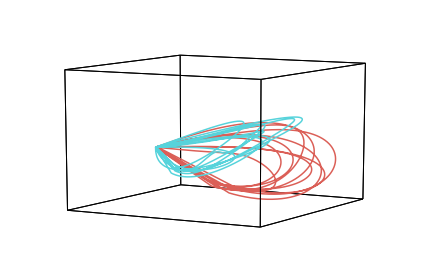

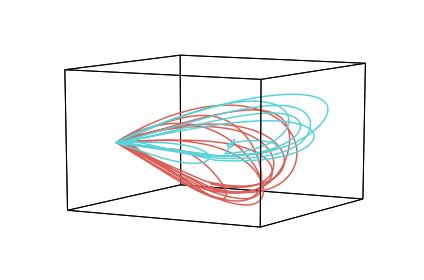

In [39]:
# Plot binned_spikes for left and right trials
geo = hyp.plot([left_b_spikes_d3.data, right_b_spikes_d3.data])

# Plot binned_spikes for truncated left and right trials
geo = hyp.plot([left_b_spikes_trunc_d3.data, right_b_spikes_trunc_d3.data])

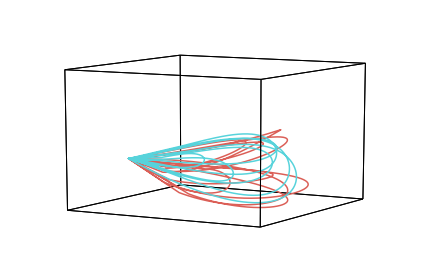

In [59]:
aligned_spks_d3 = hyp.align([left_b_spikes_d3.data, right_b_spikes_d3.data])
geo = hyp.plot(aligned_spks_d3)

In [40]:
# Construct binned spikes (Q-matrix) using on-track data.
on_track_start_d4 = info_d4.task_times['on_track'].time[0, 0]
on_track_end_d4 = info_d4.task_times['on_track'].time[0, 1]
binsize = 0.025

binned_spikes_d4 = nept.utils.bin_spikes(spikes_d4, [on_track_start_d4, on_track_end_d4], binsize, gaussian_std=2, normalized=True)
print(binned_spikes_d4.data.shape)

(97059, 64)


In [51]:
# Find left and right trials
left_epochs_d4 = info_d4.experiment_times['left_trials'].time
right_epochs_d4 = info_d4.experiment_times['right_trials'].time

left_b_spikes_d4 = binned_spikes_d4.time_slice(left_epochs_d4[:, 0], left_epochs_d4[:, 1])
right_b_spikes_d4 = binned_spikes_d4.time_slice(right_epochs_d4[:, 0], right_epochs_d4[:, 1])

print(left_b_spikes_d4.data.shape)
print(right_b_spikes_d4.data.shape)

(6148, 64)
(12156, 64)


In [52]:
# Find the smallest trial interval for both left and right trials
epochs_d4 = np.concatenate((left_epochs_d4, right_epochs_d4), axis=0)
min_interval_d4 = min(epochs_d4[:, 1] - epochs_d4[:, 0])

left_b_spikes_trunc_d4 = binned_spikes_d4.time_slice((left_epochs_d4[:, 1] - min_interval_d4), left_epochs_d4[:, 1])
right_b_spikes_trunc_d4 = binned_spikes_d4.time_slice((right_epochs_d4[:, 1] - min_interval_d4), right_epochs_d4[:, 1])

print(left_b_spikes_trunc_d4.data.shape)
print(right_b_spikes_trunc_d4.data.shape)

(2904, 64)
(1848, 64)


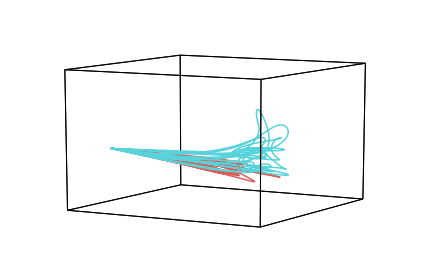

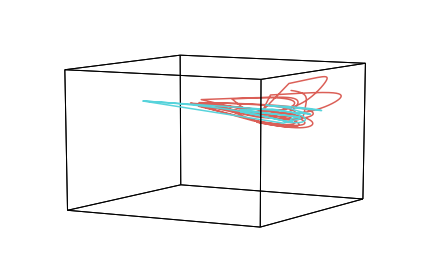

In [58]:
# Plot binned_spikes for left and right trials
geo = hyp.plot([left_b_spikes_d4.data, right_b_spikes_d4.data])

# Plot binned_spikes for truncated left and right trials
geo = hyp.plot([left_b_spikes_trunc_d4.data, right_b_spikes_trunc_d4.data])